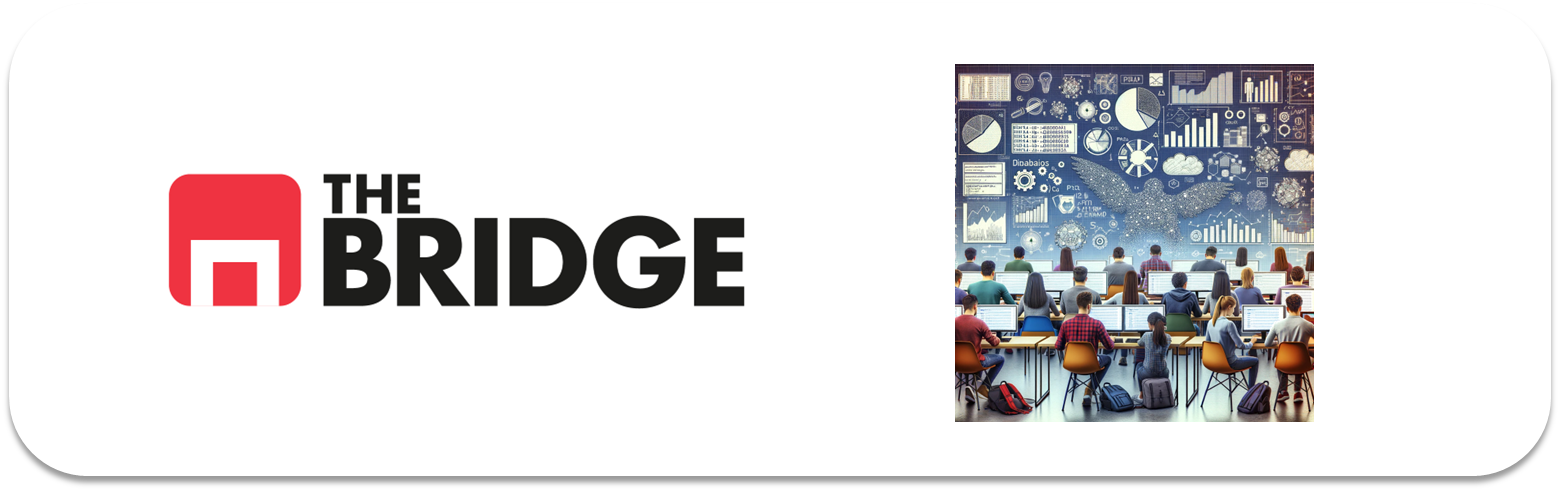

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [5]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import seaborn as sns
sns.set_style('whitegrid')

In [6]:
df_houses = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv")


FileNotFoundError: [Errno 2] No such file or directory: './data/hard_to_find/obligatoria_hard.csv'

In [ ]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV  506 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [ ]:
df_houses.describe()

,CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV
count,506
unique,506
top,0.00632|18.0|2.31|0.0|0.538|6.575|65.2|4.09|1....
freq,1


In [ ]:
df_houses.columns

Index(['CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV'], dtype='object')

In [ ]:
df_houses.head()

,CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV
0,0.00632|18.0|2.31|0.0|0.538|6.575|65.2|4.09|1....
1,0.02731|0.0|7.07|0.0|0.469|6.421|78.9|4.9671|2...
2,0.02729|0.0|7.07|0.0|0.469|7.185|61.1|4.9671|2...
3,0.03237|0.0|2.18|0.0|0.458|6.998|45.8|6.0622|3...
4,0.06905|0.0|2.18|0.0|0.458|7.147|54.2|6.0622|3...


In [ ]:
df_h = df_houses['CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV'].str.split('|', expand=True)

# Renombra las columnas para que tengan nombres significativos
df_h.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

# Convierte las columnas numéricas al tipo de datos adecuado (puedes necesitar ajustar esto según tus datos)
df_h = df_h.apply(pd.to_numeric, errors='coerce')

# Muestra la información del DataFrame resultante
print(df_h.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None


In [ ]:
df_h.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


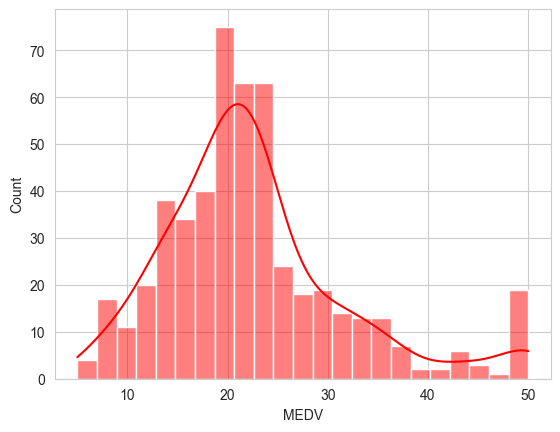

In [ ]:
# Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
sns.histplot(df_h['MEDV'], color = 'red', kde = True)
plt.show()
#VALOR MEDIO DE VIVIENDAS, DIRÍA QUE ES LA VARIABLE TARGET, además tiene la campana de gaus, es idonea.

In [ ]:
#analisis multivariante
df_h.corr(numeric_only = True)
#todas lo son

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


In [4]:
plt.figure(figsize (10,10))
sns.heatmap(df_h.corr(numeric_only = True), cmap = 'blue', annot = True);
plt.show()

NameError: name 'figsize' is not defined

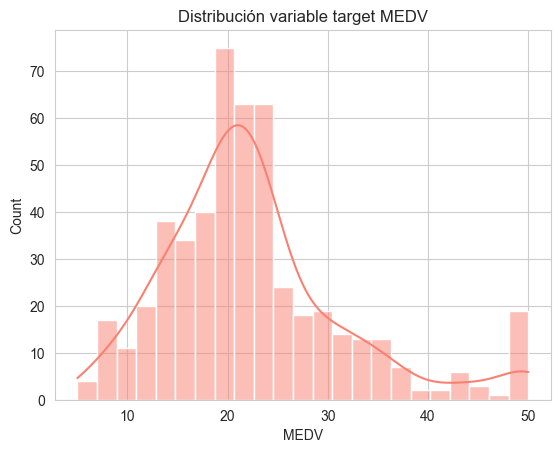

In [ ]:

sns.histplot(df_h['MEDV'], color = 'Salmon', kde = True)
plt.title('Distribución variable target MEDV')
plt.show()
#VALOR MEDIO DE VIVIENDAS, DIRÍA QUE ES LA VARIABLE TARGET

In [ ]:
#3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
n_split = 60
train_set = df_h.iloc[:n_split]
test_set = df_h.iloc[n_split:]
target = 'MEDV'
x_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
x_test = test_set.drop(target,axis = 1)
y_test = test_set[target]

In [ ]:
#4. Construye las parejas X,y de train y test
print('f el x.train es', x_train.shape)
print('f el x.test es',x_test.shape)
print('f el y.train es',y_train.shape)
print('f el y.test es',y_test.shape)

f el x.train es (60, 12)
f el x.test es (446, 12)
f el y.train es (60,)
f el y.test es (446,)


#5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

Elijo estas dos porque me parece interesante ver el índice de criminalidad en barrios donde la vivienda es más baja o alta.

***CRIM:*** Tasa de criminalidad per cápita por ciudad  



6. Trata las variables para que funcionen lo mejor posible en el modelo.


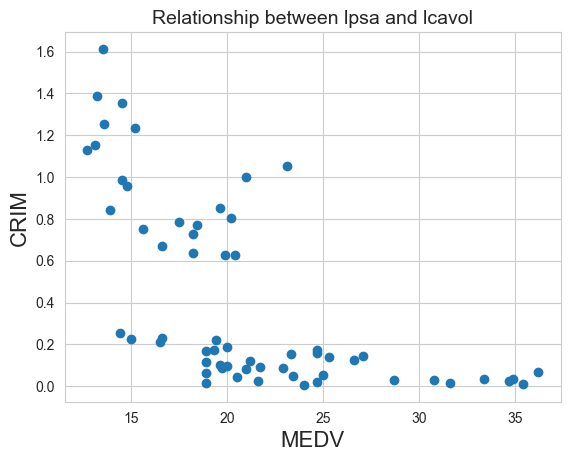

In [ ]:
plt.scatter(train_set['MEDV'], train_set['CRIM'])
plt.xlabel('MEDV', fontsize=16)
plt.ylabel('CRIM', fontsize=16)
plt.title("Relationship between lpsa and lcavol", fontsize=14)
plt.show()

In [ ]:

#7. Construye un modelo de regresión lineal.
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('Train MSE:', metrics.mean_squared_error(y_train, lr.predict(x_train)))
print("Test MSE:", metrics.mean_squared_error(y_test, lr.predict(x_test)))

Train MSE: 4.555059101327304
Test MSE: 2812.4178832004645


In [ ]:
#8. Analiza si lo crees conveniente los pesos y la importancia de las features.
from sklearn.linear_model import Ridge #modelo de regresión lineal

ridgeR = Ridge(alpha = 10) # alpha es lambda 
ridgeR.fit(x_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(x_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(x_test)),2))

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(x_train)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(x_test)),2))
# print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))

Train MSE sin regularización: 4.56
Test MSE sin regularización: 2812.42
Train MSE: 6.81
Test MSE: 142.07


In [ ]:
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=0.1) #modelo regresión lineal con alpha a 0,1
lassoR.fit(x_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(x_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(x_test)),2))

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(x_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(x_test)))

Train MSE sin regularización: 4.56
Test MSE sin regularización: 2812.42
Train MSE: 5.3816
Test MSE: 97.9694


In [ ]:
lassoR = Lasso(alpha = 0.02) 
lassoR.fit(x_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(x_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(x_test)))

Train MSE: 4.9715
Test MSE: 543.2371


In [ ]:
#8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
y_train_pred = lassoR.predict(x_train)
y_test_pred = lassoR.predict(x_test)

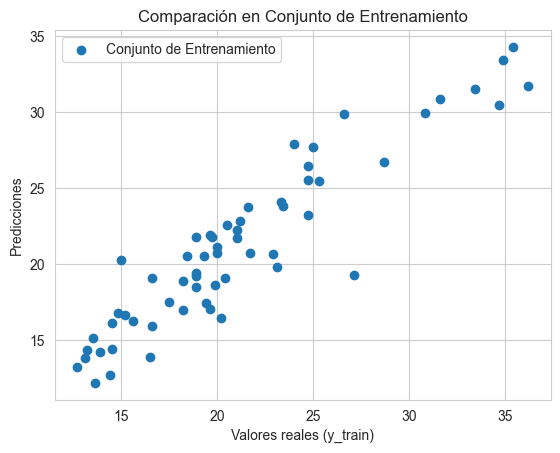

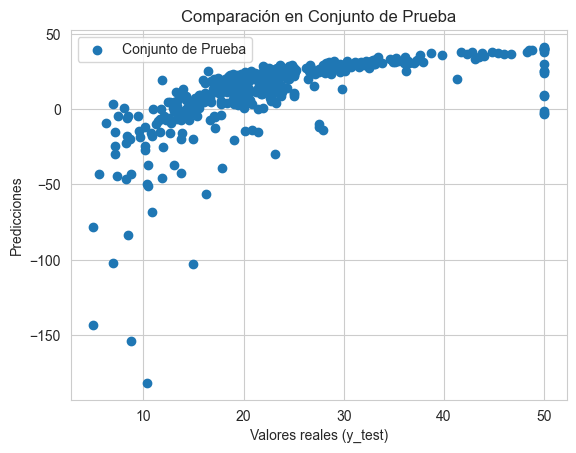

In [ ]:
plt.scatter(y_train, y_train_pred, label='Conjunto de Entrenamiento')
plt.xlabel("Valores reales (y_train)")
plt.ylabel("Predicciones")
plt.title("Comparación en Conjunto de Entrenamiento")
plt.legend()
plt.show()

# Gráfico de dispersión para conjunto de prueba
plt.scatter(y_test, y_test_pred, label='Conjunto de Prueba')
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones")
plt.title("Comparación en Conjunto de Prueba")
plt.legend()
plt.show()

In [ ]:
9#. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.

#probamos con el regression ridge
ridgeR = Ridge(alpha = 10) # alpha es lambda 
ridgeR.fit(x_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(x_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(x_test)),2))

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(x_train)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(x_test)),2))
# print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))


Train MSE sin regularización: 4.56
Test MSE sin regularización: 2812.42
Train MSE: 6.81
Test MSE: 142.07


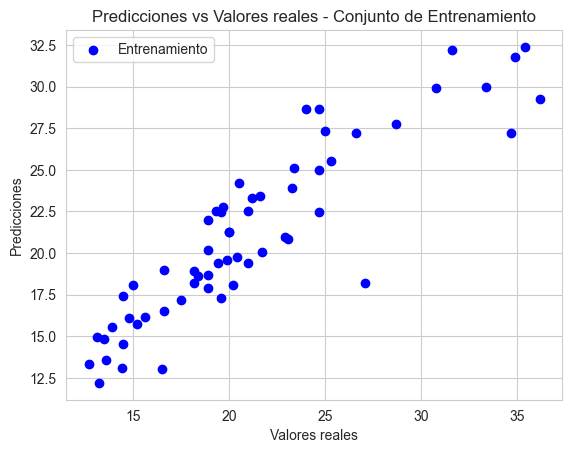

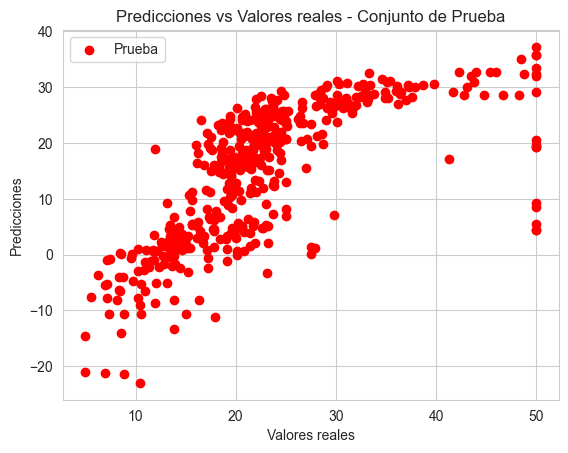

In [ ]:
y_train_pred = ridgeR.predict(x_train)
y_test_pred = ridgeR.predict(x_test)

# Gráfica para el conjunto de entrenamiento
plt.scatter(y_train, y_train_pred, c='blue', marker='o', label='Entrenamiento')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales - Conjunto de Entrenamiento')
plt.legend()
plt.show()

# Gráfica para el conjunto de prueba
plt.scatter(y_test, y_test_pred, c='red', marker='o', label='Prueba')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales - Conjunto de Prueba')
plt.legend()
plt.show()

In [ ]:
# Regresión LASSO

lassoR = Lasso(alpha=0.1) #modelo regresión lineal con alpha a 0,1
lassoR.fit(x_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(x_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(x_test)),2))

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(x_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(x_test)))

Train MSE sin regularización: 4.56
Test MSE sin regularización: 2812.42
Train MSE: 5.3816
Test MSE: 97.9694


In [ ]:
lassoR = Lasso(alpha = 0.02) 
lassoR.fit(x_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(x_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(x_test)))

Train MSE: 4.9715
Test MSE: 543.2371


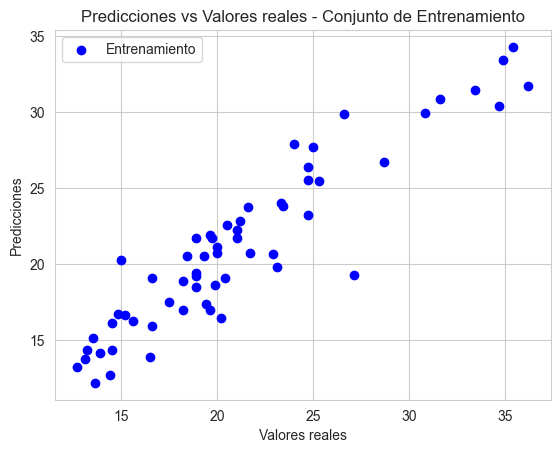

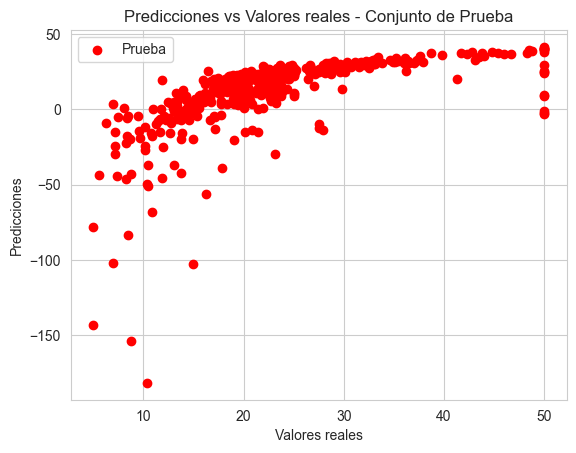

In [ ]:
y_train_pred = lassoR.predict(x_train)
y_test_pred = lassoR.predict(x_test)

plt.scatter(y_train, y_train_pred, c='blue', marker='o', label='Entrenamiento')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales - Conjunto de Entrenamiento')
plt.legend()
plt.show()

plt.scatter(y_test, y_test_pred, c='red', marker='o', label='Prueba')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales - Conjunto de Prueba')
plt.legend()
plt.show()

In [ ]:
# Regresion Elastic


elastic_net = ElasticNet(alpha = 0.5, l1_ratio = 0.5)
elastic_net.fit(x_train, y_train)

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(x_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(x_test)))

Train MSE: 7.9295
Test MSE: 123.8254


In [ ]:
elastic_net = ElasticNet(alpha = 0.02, l1_ratio=1)
elastic_net.fit(x_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(x_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(x_test)))

Train MSE: 4.9715
Test MSE: 543.2371


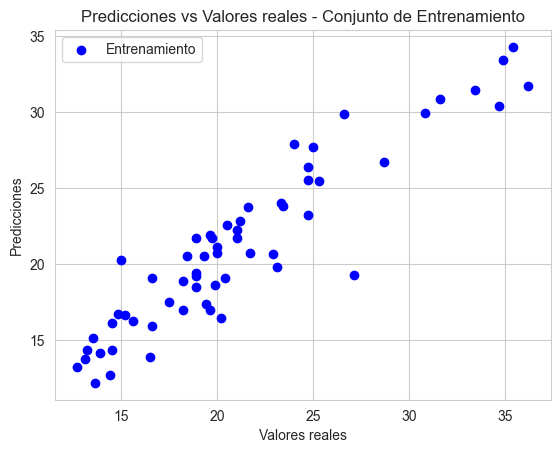

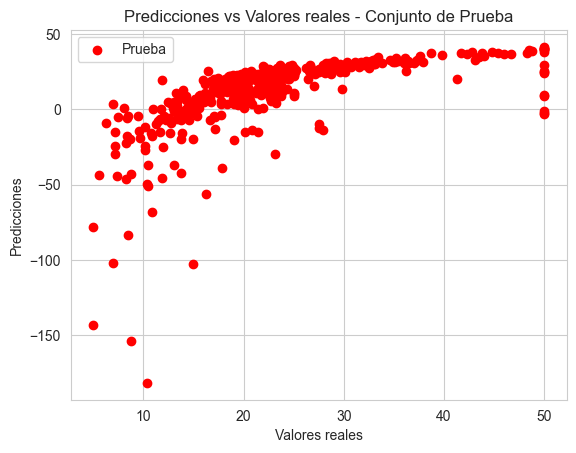

In [ ]:

y_train_pred = elastic_net.predict(x_train)
y_test_pred = elastic_net.predict(x_test)

plt.scatter(y_train, y_train_pred, c='blue', marker='o', label='Entrenamiento')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales - Conjunto de Entrenamiento')
plt.legend()
plt.show()

plt.scatter(y_test, y_test_pred, c='red', marker='o', label='Prueba')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales - Conjunto de Prueba')
plt.legend()
plt.show()



10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?

Me quedaría con el método Lasso o el Elastic, ya que son los que más se asekmejan y los que mejor pueden cuadrar con las predicciones.
De todos modos prefiero ver la clase en vivo, estos sprints me están costando un pooco.
